# 0: Starting the Project 🏴 

In this stage, the initial dataset, all tools and nesessary libraries are loaded for the project.

In addition, a general inspection of the dataset is done to get an "idea", "a feel", "an understanding" of the data.

----

## 0.1: Importing Process 🔃 

Necessary libraries, files, and configurations are made.

Although some prefer to load their libraries around where its use takes place, I like to load every library in the beginning. 

> *Seeing all the imported libraries at the start, gives a general idea of the type of work expected.*

In [47]:
# Library Imports
import math
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import display_markdown
# Configurations
mpl.rcParams['figure.dpi'] = 600
pd.options.mode.chained_assignment = None  # default='warn'

----

## 0.2: General Data Inspection 🔍

This is where I conduct a general inspection of the data to understand it, and answer questions such as:

1. What type of dataset do I have?
2. Does it feel complete?
3. What are the data features I am looking at?
4. Right of the bat, can I make any glaring conclusions?
5. What tools will I need? (Cloud tools, because the data is too big, etc.)

> *This stage is simply **reconnaissance**.*

In [2]:
# Read the dataframe into a variable
df = pd.read_csv('assets/dataset.csv', low_memory=False)

# What are the data features/columns and associated data types, no of entries, memory used?
print(df.info())

# Let me look at the first few entries of the data.
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [14]:
# Are there any missing values? How many?
def CheckTotalMissingValueCount(df=df):
    column_labels = df.columns
    total_count = 0
    for label in column_labels:
        total_count = total_count + df[label].isna().sum()
    missing_data_ratio = total_count/(df.shape[0]*df.shape[1])
    return total_count, missing_data_ratio

print(f'{CheckTotalMissingValueCount()[0]:,} out of {math.prod(df.shape):,}' , 'data cells are missing')
print('%.2f'%(CheckTotalMissingValueCount()[1]*100), '% of all data cells is missing')

11,154,479 out of 45,502,674  data cells are missing
24.51 % of all data cells is missing


-----

## 0.3: Closing Remarks 📜

**General Observation**

A few remarks could be made about this dataset:

- There are 42 total columns (or data features)
- 17 datatypes are float64 which can be losely understood as a number
- 25 datatypes are object, which could mean two things:
    - they are string objects
    - they are of a mixed data type


<hr style="border:2px solid white">

# 1.0: Data Cleaning 🧹

In this section, I will express, through work, my ability in performing data cleaning, and pre-processing activities.

## 1.1: Identify the columns with mixed data types

From the previous secion we had identified the datatypes of the columns: 

- 17 of which are _float64_ and the remaining 25 are of _object_ datatype.

Depending on the program that is being used to analyze the data, the types of data that we can fit our dataset into may differ. For example, _R_ program uses the _char_ datatype to identify  _object_ datatypes in _pandas_.

In Python however, we shall check the _object_ datatype:

1. It is possible that the column is ONLY _string_ data type, then we don't consider it as of a mixed datatype.
2. If they are of more than one data type (e.g. _float_ and _string_) then we consider it to be of **mixed data type**
3. Further more, if it is of **mixed data type**, it could be that they are *NaN* values, which are simply missing data.


>**Hypothesis**: _object_ datatype column contains either _string_ which is **NOT** of **mixed data type** or it is _NaN_ which is considered as **mixed data type**


**Solution Strategy**:
1. Implement a function to produce an array with the different datatypes for each column
2. Seperate all columns if they are of _object_ datatype
3. If the length of the array is greater than 1, then it is of mixed datatype


Further inspection of the *object* datatype answers the **mixed data type** problem and confirms or rejects hypothesis.

In [64]:
''' Get the datatype present in each column of a given dataset'''
def GetAllColumnsDataTypes(df=df):
    
    def GetEachColDataTypes(column_series=pd.Series):
        column_series = column_series.sort_values()
        dtypes = []
        for index,item in enumerate(column_series):
            if index == 0:
                dtypes.append(type(item))
            if dtypes[-1] is not type(item):
                dtypes.append(type(item))
        return dtypes

    column_dtypes = []

    for col_name in df.columns:
        column_dtypes.append({ 
            'col_name':col_name,
            'dtypes':GetEachColDataTypes(df[col_name])
            })
    
    return column_dtypes

# Run the funtion above to check what data types are present in the columns
all_column_dtypes = GetAllColumnsDataTypes()

In [68]:
md_txt = '|No|Column|Datatypes|\n|--|--|--|\n'
for index, column in enumerate(all_column_dtypes, start=1):
    label = column['col_name']
    column_dtypes = ', '.join([str(d_type) for d_type in column['dtypes']])
    md_txt = md_txt + f'|{index}|{label}|{column_dtypes}|\n'
display_markdown(md_txt, raw=True)

|No|Column|Datatypes|
|--|--|--|
|1|restaurant_link|<class 'str'>|
|2|restaurant_name|<class 'str'>|
|3|original_location|<class 'str'>|
|4|country|<class 'str'>|
|5|region|<class 'str'>, <class 'float'>|
|6|province|<class 'str'>, <class 'float'>|
|7|city|<class 'str'>, <class 'float'>|
|8|address|<class 'str'>|
|9|latitude|<class 'float'>|
|10|longitude|<class 'float'>|
|11|claimed|<class 'str'>, <class 'float'>|
|12|awards|<class 'str'>, <class 'float'>|
|13|popularity_detailed|<class 'str'>, <class 'float'>|
|14|popularity_generic|<class 'str'>, <class 'float'>|
|15|top_tags|<class 'str'>, <class 'float'>|
|16|price_level|<class 'str'>, <class 'float'>|
|17|price_range|<class 'str'>, <class 'float'>|
|18|meals|<class 'str'>, <class 'float'>|
|19|cuisines|<class 'str'>, <class 'float'>|
|20|special_diets|<class 'str'>, <class 'float'>|
|21|features|<class 'str'>, <class 'float'>|
|22|vegetarian_friendly|<class 'str'>|
|23|vegan_options|<class 'str'>|
|24|gluten_free|<class 'str'>|
|25|original_open_hours|<class 'str'>, <class 'float'>|
|26|open_days_per_week|<class 'float'>|
|27|open_hours_per_week|<class 'float'>|
|28|working_shifts_per_week|<class 'float'>|
|29|avg_rating|<class 'float'>|
|30|total_reviews_count|<class 'float'>|
|31|default_language|<class 'str'>, <class 'float'>|
|32|reviews_count_in_default_language|<class 'float'>|
|33|excellent|<class 'float'>|
|34|very_good|<class 'float'>|
|35|average|<class 'float'>|
|36|poor|<class 'float'>|
|37|terrible|<class 'float'>|
|38|food|<class 'float'>|
|39|service|<class 'float'>|
|40|value|<class 'float'>|
|41|atmosphere|<class 'float'>|
|42|keywords|<class 'str'>, <class 'float'>|


In [69]:
'''Separate all columns that have mixed data types present in them'''
def GetMixedDataTypeColumns(all_column_dtypes = all_column_dtypes):
    mixed_dtype_cols = []
    for col_dtypes in all_column_dtypes:
        if len(col_dtypes['dtypes']) > 1:
            mixed_dtype_cols.append(col_dtypes)
    return mixed_dtype_cols

# Run the function above to filter and retrieve only the columns with mixed datatypes
mixed_dtype_cols = GetMixedDataTypeColumns()
mixed_cols_names = [name['col_name'] for name in mixed_dtype_cols]

In [70]:
# Printing all columns with mixed datatypes

md_txt = '|No|Column|Datatypes|\n|--|--|--|\n'

for index, column in enumerate(mixed_dtype_cols, start=1):
    label = column['col_name']
    column_dtypes = ', '.join([str(d_type) for d_type in column['dtypes']])
    md_txt = md_txt + f'|{index}|{label}|{column_dtypes}|\n'

display_markdown(md_txt, raw=True)

|No|Column|Datatypes|
|--|--|--|
|1|region|<class 'str'>, <class 'float'>|
|2|province|<class 'str'>, <class 'float'>|
|3|city|<class 'str'>, <class 'float'>|
|4|claimed|<class 'str'>, <class 'float'>|
|5|awards|<class 'str'>, <class 'float'>|
|6|popularity_detailed|<class 'str'>, <class 'float'>|
|7|popularity_generic|<class 'str'>, <class 'float'>|
|8|top_tags|<class 'str'>, <class 'float'>|
|9|price_level|<class 'str'>, <class 'float'>|
|10|price_range|<class 'str'>, <class 'float'>|
|11|meals|<class 'str'>, <class 'float'>|
|12|cuisines|<class 'str'>, <class 'float'>|
|13|special_diets|<class 'str'>, <class 'float'>|
|14|features|<class 'str'>, <class 'float'>|
|15|original_open_hours|<class 'str'>, <class 'float'>|
|16|default_language|<class 'str'>, <class 'float'>|
|17|keywords|<class 'str'>, <class 'float'>|


### ✅ **Results and Conclusion**

As observed based on the table above, we have identified all the columns (17 of them) with mixed data type: 

1. String <class 'str'>; and
2. Float <class 'float'>

*['region', 'province', 'city', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'original_open_hours', 'default_language', 'keywords']*

----

## 1.2: For each column, count the number of rows per data type

Now we shall count the number of rows per data type

Why would there be a _float_ value in a column **supposed to be** only for strings?

Unless this _float_ value is an _NaN_. However, it could be of **a different datatype** Hence, we cannot assume that all float values are NaN values.

> **Hypothesis** All the columns with mixed data type contain either _string_ or _NaN_ values

**Solution Strategy**

If we can show that after filling all _NaN_ values with a _string_ that all columns, initially with mixed data type, now have only one datatype, then we've proved the hypothesis.

1. Using the *.fillna* Pandas function to fill all _NaN) values.
2. Then repeat the previously defined function: *GetMixedDataTypeColumns(GetAllColumsDataType())*
3. Check the list length of the output of the composite function (should be 0)

In [63]:
# Fill all NaN values in the mixed datatype columns
na_filled = df[mixed_cols_names].fillna('Unavailable')

# Run the composite funtion to check if it is still of mixed datatype
mixed_result = GetMixedDataTypeColumns(GetAllColumnsDataTypes(na_filled))

# Check the result to confirm hypothesis
display_markdown(f'The length of the output list is: **{len(mixed_result)}**', raw=True)

The length of the output list is: **0**

In [60]:
# Find the missing values in "mixed columns"
md_txt = '|No|Column|Total|Missing|Non-Missing|\n|--|--|--|--|--|\n'

for index,column in enumerate(mixed_cols_names, start=1):
    total_val = len(df[column])
    missing = df[column].isnull().sum()
    non_missing = total_val - missing
    md_txt = md_txt + f'| {index} | {column} | {total_val:,} | {missing:,} | {non_missing:,} | \n'

display_markdown(md_txt, raw=True)

|No|Column|Total|Missing|Non-Missing|
|--|--|--|--|--|
| 1 | region | 1,083,397 | 50,323 | 1,033,074 | 
| 2 | province | 1,083,397 | 340,632 | 742,765 | 
| 3 | city | 1,083,397 | 400,685 | 682,712 | 
| 4 | claimed | 1,083,397 | 1,842 | 1,081,555 | 
| 5 | awards | 1,083,397 | 820,264 | 263,133 | 
| 6 | popularity_detailed | 1,083,397 | 94,988 | 988,409 | 
| 7 | popularity_generic | 1,083,397 | 97,792 | 985,605 | 
| 8 | top_tags | 1,083,397 | 110,634 | 972,763 | 
| 9 | price_level | 1,083,397 | 277,205 | 806,192 | 
| 10 | price_range | 1,083,397 | 779,070 | 304,327 | 
| 11 | meals | 1,083,397 | 448,050 | 635,347 | 
| 12 | cuisines | 1,083,397 | 169,103 | 914,294 | 
| 13 | special_diets | 1,083,397 | 743,141 | 340,256 | 
| 14 | features | 1,083,397 | 765,990 | 317,407 | 
| 15 | original_open_hours | 1,083,397 | 489,565 | 593,832 | 
| 16 | default_language | 1,083,397 | 95,193 | 988,204 | 
| 17 | keywords | 1,083,397 | 984,199 | 99,198 | 


### ✅ **Results and Conclusions**

Since the funtion we ran returned an empty result, we can conclude the following:

1. All the _float_ value data were actually _NaN_ values (misisng values)
2. Replacing them with _string_ value 'Unavailable' proves the hypothesis that  all columns with mixed datatype contain either _string_ or _NaN_ values

----

## 1.3: Would removing missing values solve the mixed data type problem?

What does **solve** mean? 

If it simply means that the program will no longer read a column as of mixed datatype then **YES**, it will solve the **mixed data type** problem

However, if we are talking about it being a problem that interferes with our work, then **It Depends**.

We can ask two important questions to define whether or not it is a problem:

1. What is the objective we trying to reach with this dataset? What information are we trying to derive?

2. If we discard the missing values, does that significantly affect our expected outcome or stop you from achieving the goal?

The above questions are general enough to answer this question. It all depends on **the goal**, **the target**, **the objective**.

> **But** in cases where you require the data since it may affect a **prediction** or **model accuracy**, then **data imputation** becomes the subject of discussion. 

<hr style="border:2px solid white">

# 2.0 Data Understanding 📖

In this section, I will express, through work, my ability in performing data cleaning activities.

## 2.1: Are the review columns correlated with the rating columns?
 
 - Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
 - Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]


**Solution Strategy**

Our objective is to show correlation between two sets of variables
1. Treat this as a multivariate correlation problem
2. Create a correlation matrix 
3. Visualised as heat map and make conclusions accordingly.

In [73]:
# Creating the rating-review dataframe
review_cols_labels = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_cols_labels = ["food", "service", "value", "atmosphere", "avg_rating"]
rating_review_df = df[[*review_cols_labels,*rating_cols_labels]]

# Creating the correlation matrix
rating_review_corrM = rating_review_df.corr()
rating_review_corrM

,excellent,very_good,average,poor,terrible,total_reviews_count,reviews_count_in_default_language,food,service,value,atmosphere,avg_rating
excellent,1.000000,0.842964,0.733120,0.632904,0.497784,0.716426,0.959361,0.128760,0.134771,0.099463,0.167081,0.093861
very_good,0.842964,1.000000,0.928148,0.825488,0.672637,0.710900,0.947613,0.016350,0.020838,-0.010068,0.067123,0.011779
average,0.733120,0.928148,1.000000,0.934195,0.791354,0.634119,0.887308,-0.060098,-0.051280,-0.083435,-0.014837,-0.043494
poor,0.632904,0.825488,0.934195,1.000000,0.878500,0.539704,0.805920,-0.103778,-0.093287,-0.125787,-0.057878,-0.076040
terrible,0.497784,0.672637,0.791354,0.878500,1.000000,0.449153,0.674115,-0.190457,-0.181710,-0.195707,-0.139057,-0.155270
total_reviews_count,0.716426,0.710900,0.634119,0.539704,0.449153,1.000000,0.736594,0.056542,0.037101,-0.005211,0.093915,0.036336
reviews_count_in_default_language,0.959361,0.947613,0.887308,0.805920,0.674115,0.736594,1.000000,0.054864,0.061827,0.026536,0.100821,0.038642
food,0.128760,0.016350,-0.060098,-0.103778,-0.190457,0.056542,0.054864,1.000000,0.815338,0.824252,0.627063,0.823210
service,0.134771,0.020838,-0.051280,-0.093287,-0.181710,0.037101,0.061827,0.815338,1.000000,0.797524,0.662776,0.805857
value,0.099463,-0.010068,-0.083435,-0.125787,-0.195707,-0.005211,0.026536,0.824252,0.797524,1.000000,0.560697,0.773925


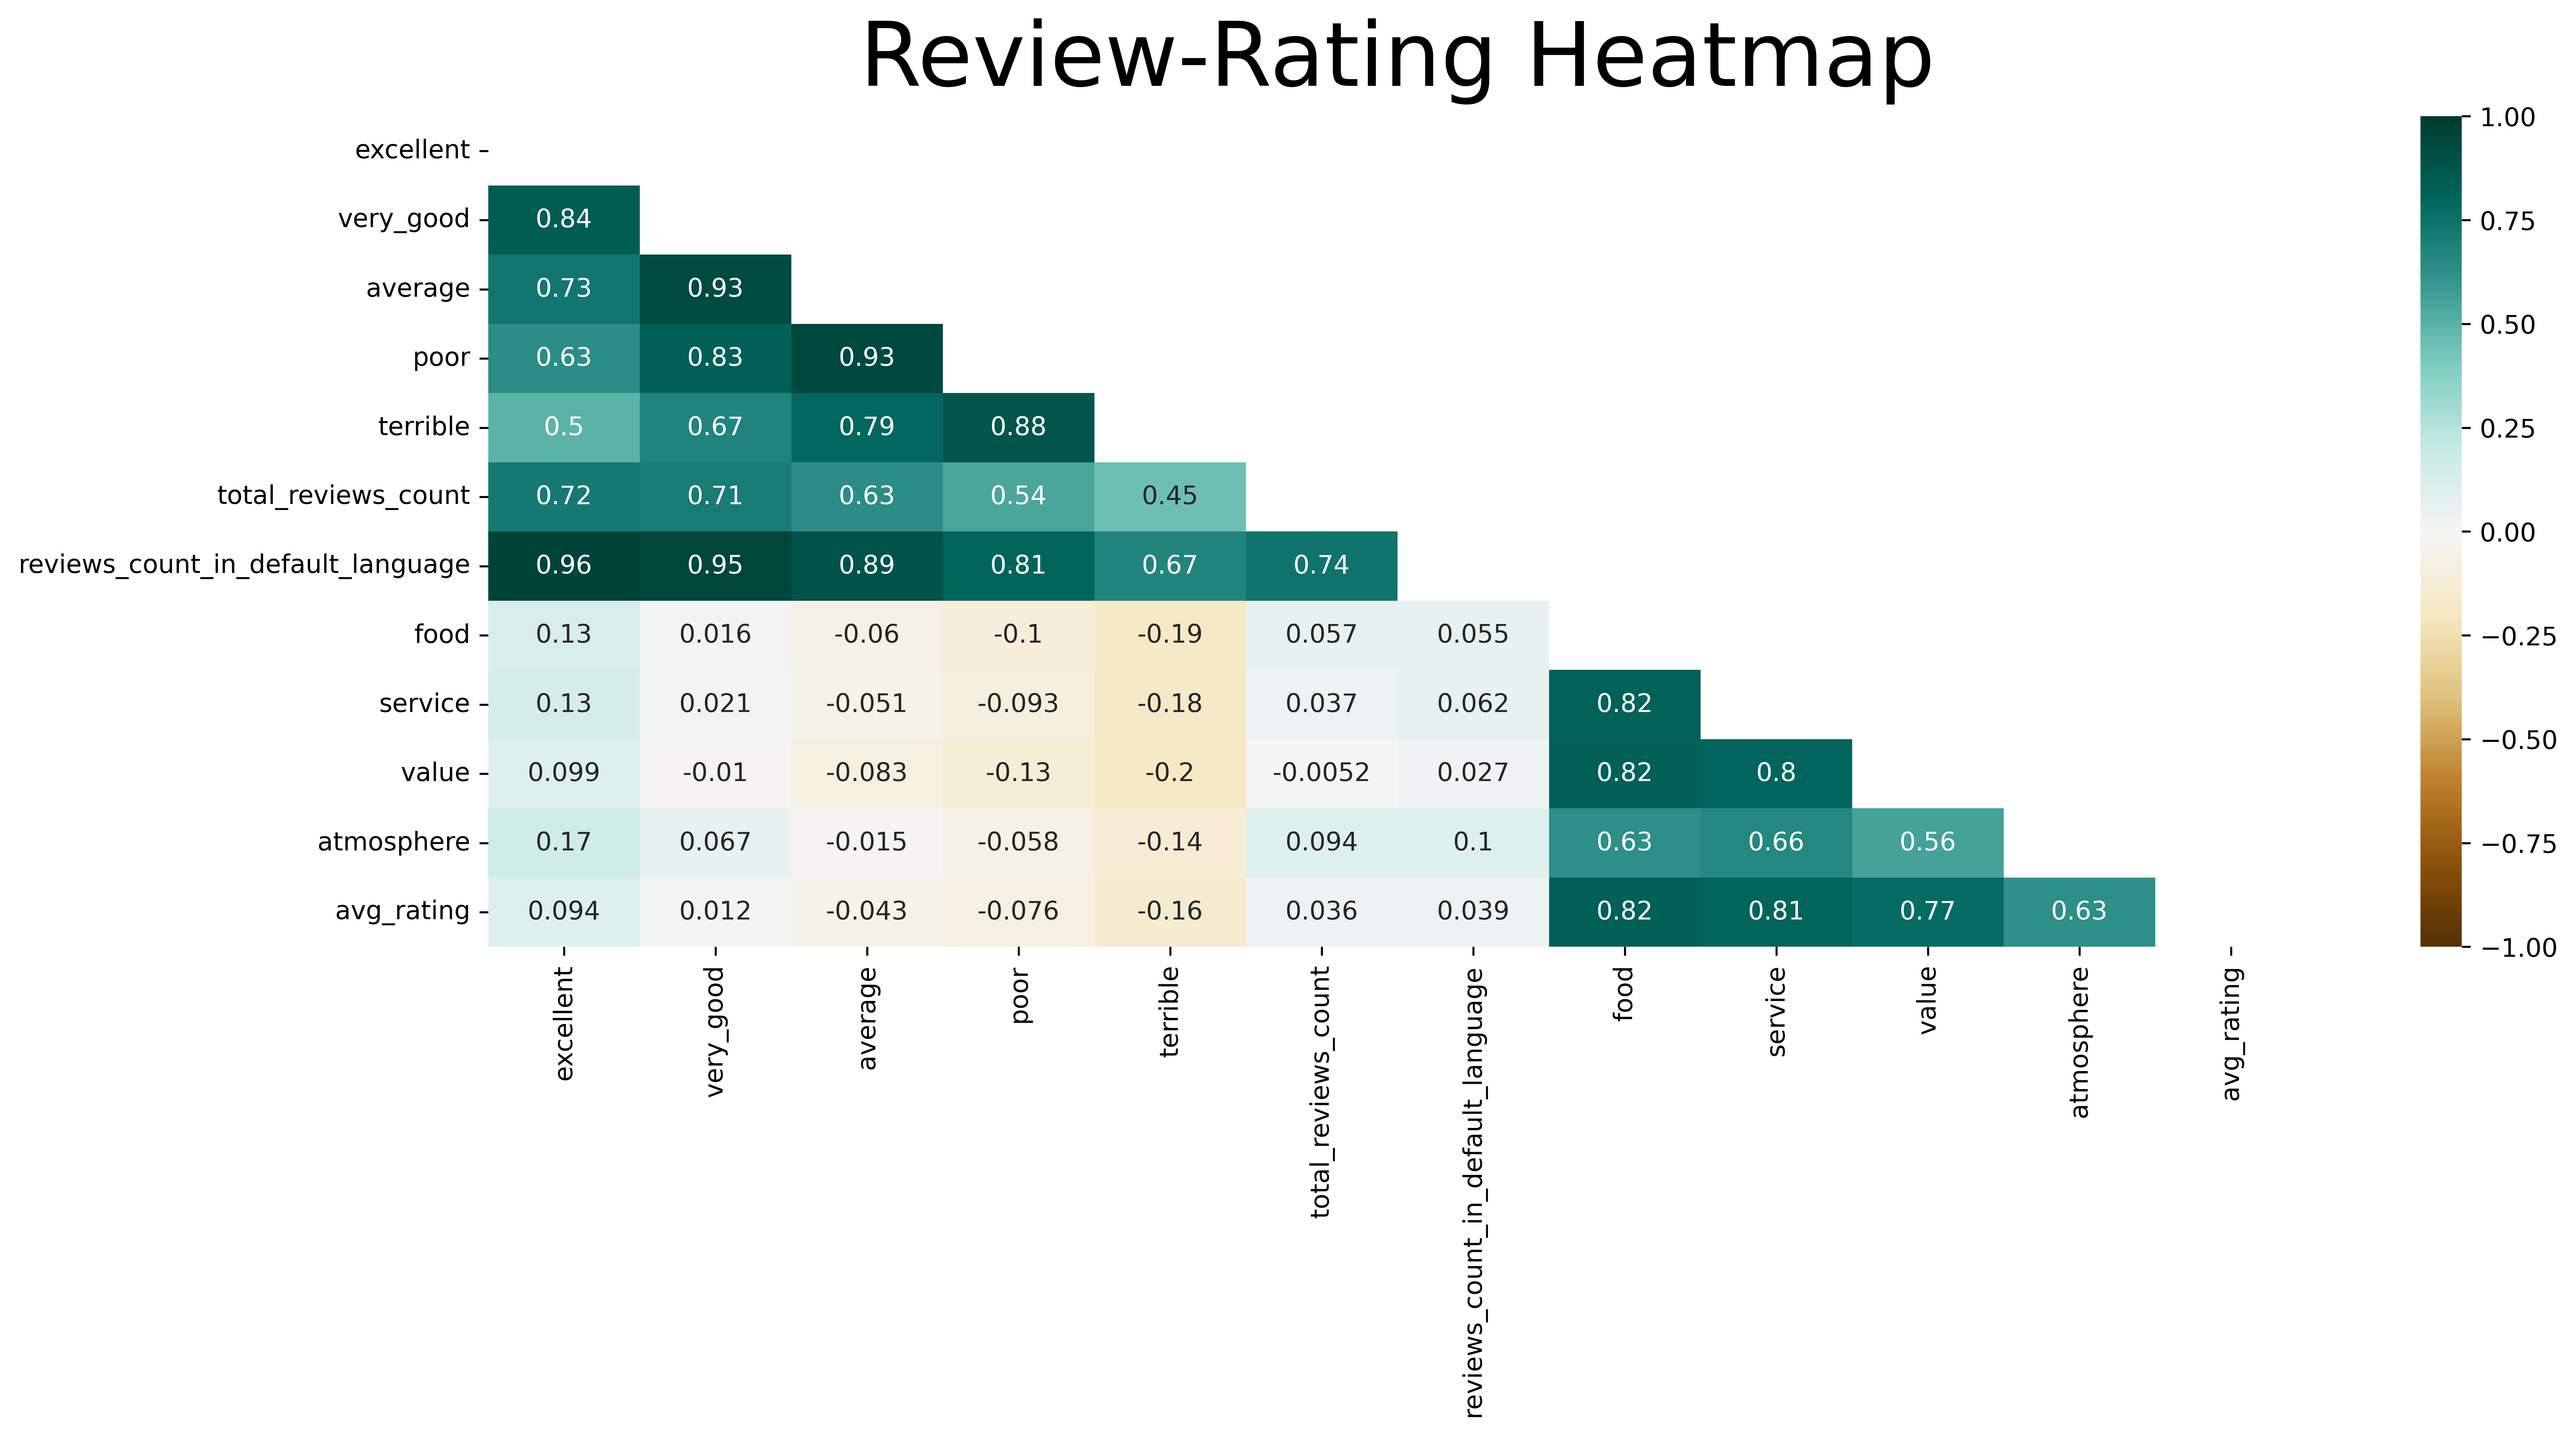

In [75]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Mask to display the lower triangle and ease data reading
mask = np.triu(np.ones_like(rating_review_corrM, dtype=bool))

# Create the heatmap
heatmap = sns.heatmap(rating_review_corrM, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Review-Rating Heatmap', fontdict={'fontsize':35}, pad=12);

### ✅ Results and Conclusion

We can make a few statements based on the heatmap above:

1. Overall, there isn't a statisticalally strong correlation between the rating and review variables (<|0.2|%)
2. "Excellent", and "very good" reviews increase as the rating increases while "average", "poor" and "terrible" review decrease.

In order to make any conclusinve statements, perhaps a different methodology should be taken.

----

## 2.2 Are vegetarian-friendly restaurants better than non-vegetarian ones?

We will define what *better* means. **Better** has 2 meanings:

1. Better means that the restaurant has a higher average rating (*avg_rating*)
2. Better means that the restaurant has higher reviews of "excellent" and "very good" and lower reviews of "poor" and "terrible"

**Solution Strategy**

1. Find the average metrics for review and ratings for both vegetarian friendly and non-friendly, 
2. Compare them against each other and then draw a conclusion

**Notes**

But, we have to deal with the missing values (empty values) as to not have a bias in our results. Again, we talk about data imputation. In this case, we are lucky because all the values are available.

In [77]:
# Create vegetarian datatable
veg_cols_labels = ['vegetarian_friendly', *review_cols_labels, *rating_cols_labels]
veg_df = df[veg_cols_labels]

In [78]:
# check for missing values to know if data is biased.
veg_df.isna().any().sum()

# As stated in notes, missing values not significant

12

In [82]:
# Comparing vegetarian-friendly with non vegetarian friendly
veg_grouped_df = veg_df.groupby(by='vegetarian_friendly').mean()
veg_non_compare = veg_grouped_df.transpose()
veg_non_compare['difference'] = (veg_non_compare['Y'].values - veg_non_compare['N'].values)
veg_non_compare['ratio_difference'] = (1-(veg_non_compare['N'].values / veg_non_compare['Y'].values))*100

veg_non_compare.sort_values(by='ratio_difference', ascending=False)

vegetarian_friendly,N,Y,difference,ratio_difference
excellent,8.475581,57.843392,49.367812,85.347366
reviews_count_in_default_language,17.400029,100.290904,82.890875,82.650441
very_good,4.336071,23.116769,18.780699,81.242748
total_reviews_count,46.474440,226.332957,179.858517,79.466340
average,1.817964,8.810135,6.992171,79.365082
poor,1.063597,5.005333,3.941736,78.750721
terrible,1.706817,5.515275,3.808458,69.052919
food,3.963376,4.235145,0.271769,6.416990
atmosphere,3.781855,4.032328,0.250474,6.211640
service,3.935194,4.191907,0.256713,6.124014


### ✅ Results and Conclusion

>We can say that based on the data above, vegetarian frienly restaurants are definitely **better** than non-vegetarian friendly restaurants.

We also notice the following:
1. The "excellent" review data is a good indicator of the difference between vegetarian-friendly and non-vegetarian friendly.
2. The "average" doesn't change much as would be expected

----

## 2.3: Are there any significantly more expensive cuisines?

To answer this quesiton, first we need to define _expensive_ and _significanty_

>**Expensive** means that it deviates from the average price a certain amount. 

>**Significant** (or Statistically significant) is relative and depends on the data and its charachteristics. Generally however, we consider a certain deviation away from the average as significant enough, or a cetain ends of the percentiles.

**Strategy**
- Remove any outliers as to not give a biased result
- Calculate the significant price at which can be considered expensive (90th percentile)
- For each cuizine in that percentile, get a tally of its occurances
- The Maximum occurances in that percentile can be sorted to indicate the top 10 most expensive cuizines

In [84]:
# This section mainly involves text-pre-processing activities

# Select all relevant columns
cuisine_cols_labels = ['cuisines','price_range']
cuisine_raw = df[cuisine_cols_labels]

# Start cleaning process
cuisine = cuisine_raw
cuisine.reset_index(drop=True)

# Drop all NA rows
cuisine = cuisine.dropna()

# Replace Commas in price range column as to not get decimal issues
cuisine['price_range'] = cuisine['price_range'].str.replace(',','')

# Split price range column into two
cuisine['lower_price'] = cuisine['price_range'].str.split('-', expand=True)[0]
cuisine['upper_price'] = cuisine['price_range'].str.split('-', expand=True)[1]

# Clean string and get only float for values
cuisine['upper_price'] = cuisine['upper_price'].str.extract(r'(\d+[.\d]*)').astype(float)
cuisine['lower_price'] = cuisine['lower_price'].str.extract(r'(\d+[.\d]*)').astype(float)

# Find the average price for each cuizine set
cuisine['avg_price'] = cuisine[['upper_price','lower_price']].mean(axis=1)

cuisine = cuisine.reset_index(drop=True)

In [96]:
avg_price = cuisine['avg_price'].mean()
display_markdown(f'Current mean of the avg_price ***{ avg_price:,.2f}***.', raw=True)

cuisine.sort_values(by='avg_price', ascending=False).head()

Current mean of the avg_price ***4,384.59***.

,cuisines,price_range,lower_price,upper_price,avg_price
105745,Spanish,€166390048-€665560192,166390048.0,665560192.0,415975120.0
176798,"Italian, Barbecue",€82794888-€745153984,82794888.0,745153984.0,413974436.0
211693,"Bar, Seafood, Mediterranean, Pub, Southern-Ita...",€92541544-€92541544,92541544.0,92541544.0,92541544.0
162628,Italian,€7-€142504064,7.0,142504064.0,71252035.5
173297,"Barbecue, European, Asian, Middle Eastern, Alb...",€4400000-€100000000,4400000.0,100000000.0,52200000.0


### 🗣️ Discussion

After sorting the table, it is clear that there are **outliers** that will affect the outcome and results.

> It doesn't make sence that a cuisine would be in the price range of billions compared to the rest.

Moreover, this is further confirmed in the next section where the quartiles will be calculated and any **outliers** will be removed.

> Outliers are defined as the datapoints that exist at a distance of +1.5 (or -1.5) multiplied by the interquartile range.

In [14]:
# Calculating the quartiles
cuisine_Q1 = np.percentile(cuisine['avg_price'], 25, interpolation = 'midpoint')
cuisine_Q3 = np.percentile(cuisine['avg_price'], 75, interpolation = 'midpoint')

cuisine_Q1, cuisine_Q3

IQR = cuisine_Q3 - cuisine_Q1
 
print("Old Shape: ", cuisine.shape)
 
# Upper bound
upper = np.where(cuisine['avg_price'] >= (cuisine_Q3+1.5*IQR))
# Lower bound
lower = np.where(cuisine['avg_price'] <= (cuisine_Q1-1.5*IQR))
 
cuisine.drop(upper[0], inplace = True)
cuisine.drop(lower[0], inplace = True)
 
print("New Shape: ", cuisine.shape)

Old Shape:  (296026, 5)
New Shape:  (278529, 5)


In [15]:
print(cuisine['avg_price'].mean())
display(cuisine.sort_values(by='avg_price', ascending=False).head())
display(cuisine.sort_values(by='avg_price', ascending=False).tail())


16.05739617777682


,cuisines,price_range,lower_price,upper_price,avg_price
194244,"Italian, Seafood, Mediterranean, Healthy",€25-€59,25.0,59.0,42.0
130597,"Italian, Pizza",€42-€42,42.0,42.0,42.0
289952,"Seafood, European, Danish",€17-€67,17.0,67.0,42.0
184923,"Italian, Cafe",€14-€70,14.0,70.0,42.0
134776,"Seafood, British",€17-€67,17.0,67.0,42.0


,cuisines,price_range,lower_price,upper_price,avg_price
266086,"Seafood, Mediterranean, Greek, Soups",€0-€2,0.0,2.0,1.0
286735,"Central European, Hungarian, European, Eastern...",€0-€2,0.0,2.0,1.0
268699,"Fast food, Mediterranean, European, Eastern Eu...",€0-€2,0.0,2.0,1.0
282053,"French, Mexican, American, Indian, Czech, Cafe",€0-€2,0.0,2.0,1.0
295641,French,€0-€2,0.0,2.0,1.0


### 🗣️ Discussion

We were able to remove the outliers and reduce the size of the dataset.

We can clearly see, taking the end datapoints of the starting and ending values, that the prices are realistic.

In [16]:
# Further trimming the 
cuisine_clean = cuisine.drop(columns=['lower_price', 'upper_price','price_range'])
display(cuisine_clean.head())

,cuisines,avg_price
0,French,21.5
1,"French, European",12.5
2,"French, European",22.5
3,"French, Cafe, Deli, Contemporary, Gastropub",19.0
4,"French, European, Wine Bar",21.0


### ✅ Results and Conclusion

> Yes, We did find that there were cuisines that were significantly more expensive, and that was because they were **outliers**

**Closing Remarks**

Even after removing the **outliers**, we can still further explore the **distribution** of the dataset and identify truly if there are significant values that are on the extremeties of the dataset. Basic descriptive statistics can reveal a whole lot about the nature of this data

----

# 3.0 Business Specific 🏭

In this section, I will display my ability to understand data and convert it into information used for business decision making activities.

## 3.1 Question Below:
In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?*

**Target**

Select a city where:
1. The population is highest (Max)
2. The gluten-free restaurant density is the lowest (Min)

- This is essentially an optimization problem

**Strategy**

1. Get the gluten-free restaurants and their country based on the _dataset.csv_
2. Use the data in *europe_capitals_population_and_area.csv* and find the population per area
3. Sort the data based on population per area

**Notes**

- We select population per area because in this application, this metric is more useful. If a restaurant is erected in a country with large population, but is very far away from that population, then it is not so useful. Hence, the ideal is a large population in a small area.


In [17]:
# Formulate the dataframe for use
gluten_df = df[['city','gluten_free']]

# Select only the countries which have gluten-free
gluten_df = gluten_df.loc[gluten_df['gluten_free'] == 'Y'].reset_index(drop=True)

# Find the frequency of countries with gluten
gluten_free_cities = gluten_df.groupby(by='city').count()

#Sort the gluten free countries
display(gluten_free_cities.sort_values(by='gluten_free').head())

,gluten_free
city,
Lascazeres,1
Luebbenau,1
Ludvika,1
Ludham,1
Ludgvan,1


### 🗣️ Discussion

From the above result, we have learnt that the order in which countries which have gluten-free restaurants.

It is worth noting that we still haven't found the **density** of the restaurants. For this we will have to:

1. Join the previous table result with our *europe_capitals_population_and_area.csv* dataset based on country.
2. The item that is joined is the area.
3. Then a third column is derived containing the density.

>Ofcourse, the above process assumes a uniform distribution of gluten free restaurants in that country.

>A stronger assumption is that restaurants containing gluten-free alternatives are competitors to ONLY gluten-free restaurants, and thus the conclusions built on theses assumptions become valid.

In [18]:
# Loading the new dataset
europe_capitals_df = pd.read_csv('assets/europe_capitals_population_and_area.csv', delimiter=';')
print('Before change ---')
europe_capitals_df.info()

# Area and Population column datatype should be changed, commas are also removed
europe_capitals_df['Area in km2'] = europe_capitals_df['Area in km2'].str.replace(',','').astype(float)
europe_capitals_df['Population'] = europe_capitals_df['Population'].astype(float)

# The 'Country' column label is different than 'country', so relabel is required
europe_capitals_df.rename(columns={'City':'city'}, inplace=True)

print('\n\nAfter change ---')
europe_capitals_df.info()

Before change ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CityNo       31 non-null     int64 
 1   City         31 non-null     object
 2   Country      31 non-null     object
 3   Population   31 non-null     int64 
 4   Area in km2  31 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


After change ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CityNo       31 non-null     int64  
 1   city         31 non-null     object 
 2   Country      31 non-null     object 
 3   Population   31 non-null     float64
 4   Area in km2  31 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [19]:
# Create and calculate new column of population_density in europe_capitals
europe_capitals_df['population_density'] = europe_capitals_df['Population'] / europe_capitals_df['Area in km2']

display(europe_capitals_df.sort_values(by='population_density', ascending=False).head(5))

,CityNo,city,Country,Population,Area in km2,population_density
16,17,London,England,8825000.0,607.0,14538.714992
27,28,Stockholm,Sweden,952058.0,188.0,5064.138298
14,15,Lisbon,Portugal,504718.0,100.0,5047.180000
8,9,Dublin,Ireland,527612.0,115.0,4587.930435
25,26,Prague,Czech,1301132.0,298.0,4366.214765


In [20]:
# Joining the tables
gluten_free_cities.index.dtype == europe_capitals_df['city'].dtype
gluten_capitals = europe_capitals_df.merge(gluten_free_cities, on='city')

# Create and calculate new column of gluten_restaurant_density in europe_capitals
gluten_capitals['gluten_free_restaurant_density'] = gluten_capitals['gluten_free'] / gluten_capitals['Population']

gluten_capitals.head(5)

,CityNo,city,Country,Population,Area in km2,population_density,gluten_free,gluten_free_restaurant_density
0,1,Amsterdam,Netherland,851573.0,21932.0,38.827877,622,0.000730
1,2,Athens,Greece,664046.0,2929.0,226.714237,271,0.000408
2,5,Bratislava,Slovakia,424428.0,3676.0,115.459195,67,0.000158
3,7,Budapest,Hungary,1779361.0,5252.0,338.796839,433,0.000243
4,8,Copenhagen,Denmark,602481.0,8825.0,68.269802,251,0.000417


In [21]:
# Further trim down the data required for the optimization problem
gluten_capitals = gluten_capitals[['city', 'population_density', 'gluten_free_restaurant_density']]

gluten_capitals.head()

,city,population_density,gluten_free_restaurant_density
0,Amsterdam,38.827877,0.000730
1,Athens,226.714237,0.000408
2,Bratislava,115.459195,0.000158
3,Budapest,338.796839,0.000243
4,Copenhagen,68.269802,0.000417


### 🗣️ Discussion

We now have the complete data ready for our optimization problem. To reiterate, the objective is to

Find the top five cities which:
1. Have maximum population density; but
2. Minimum gluten restaurant density

In [22]:
display(gluten_capitals)

,city,population_density,gluten_free_restaurant_density
0,Amsterdam,38.827877,0.000730
1,Athens,226.714237,0.000408
2,Bratislava,115.459195,0.000158
3,Budapest,338.796839,0.000243
4,Copenhagen,68.269802,0.000417
5,Dublin,4587.930435,0.001130
6,Helsinki,342.382114,0.000315
7,Lisbon,5047.180000,0.001064
8,Lyon,105.831418,0.000107
9,Madrid,519.938938,0.000435


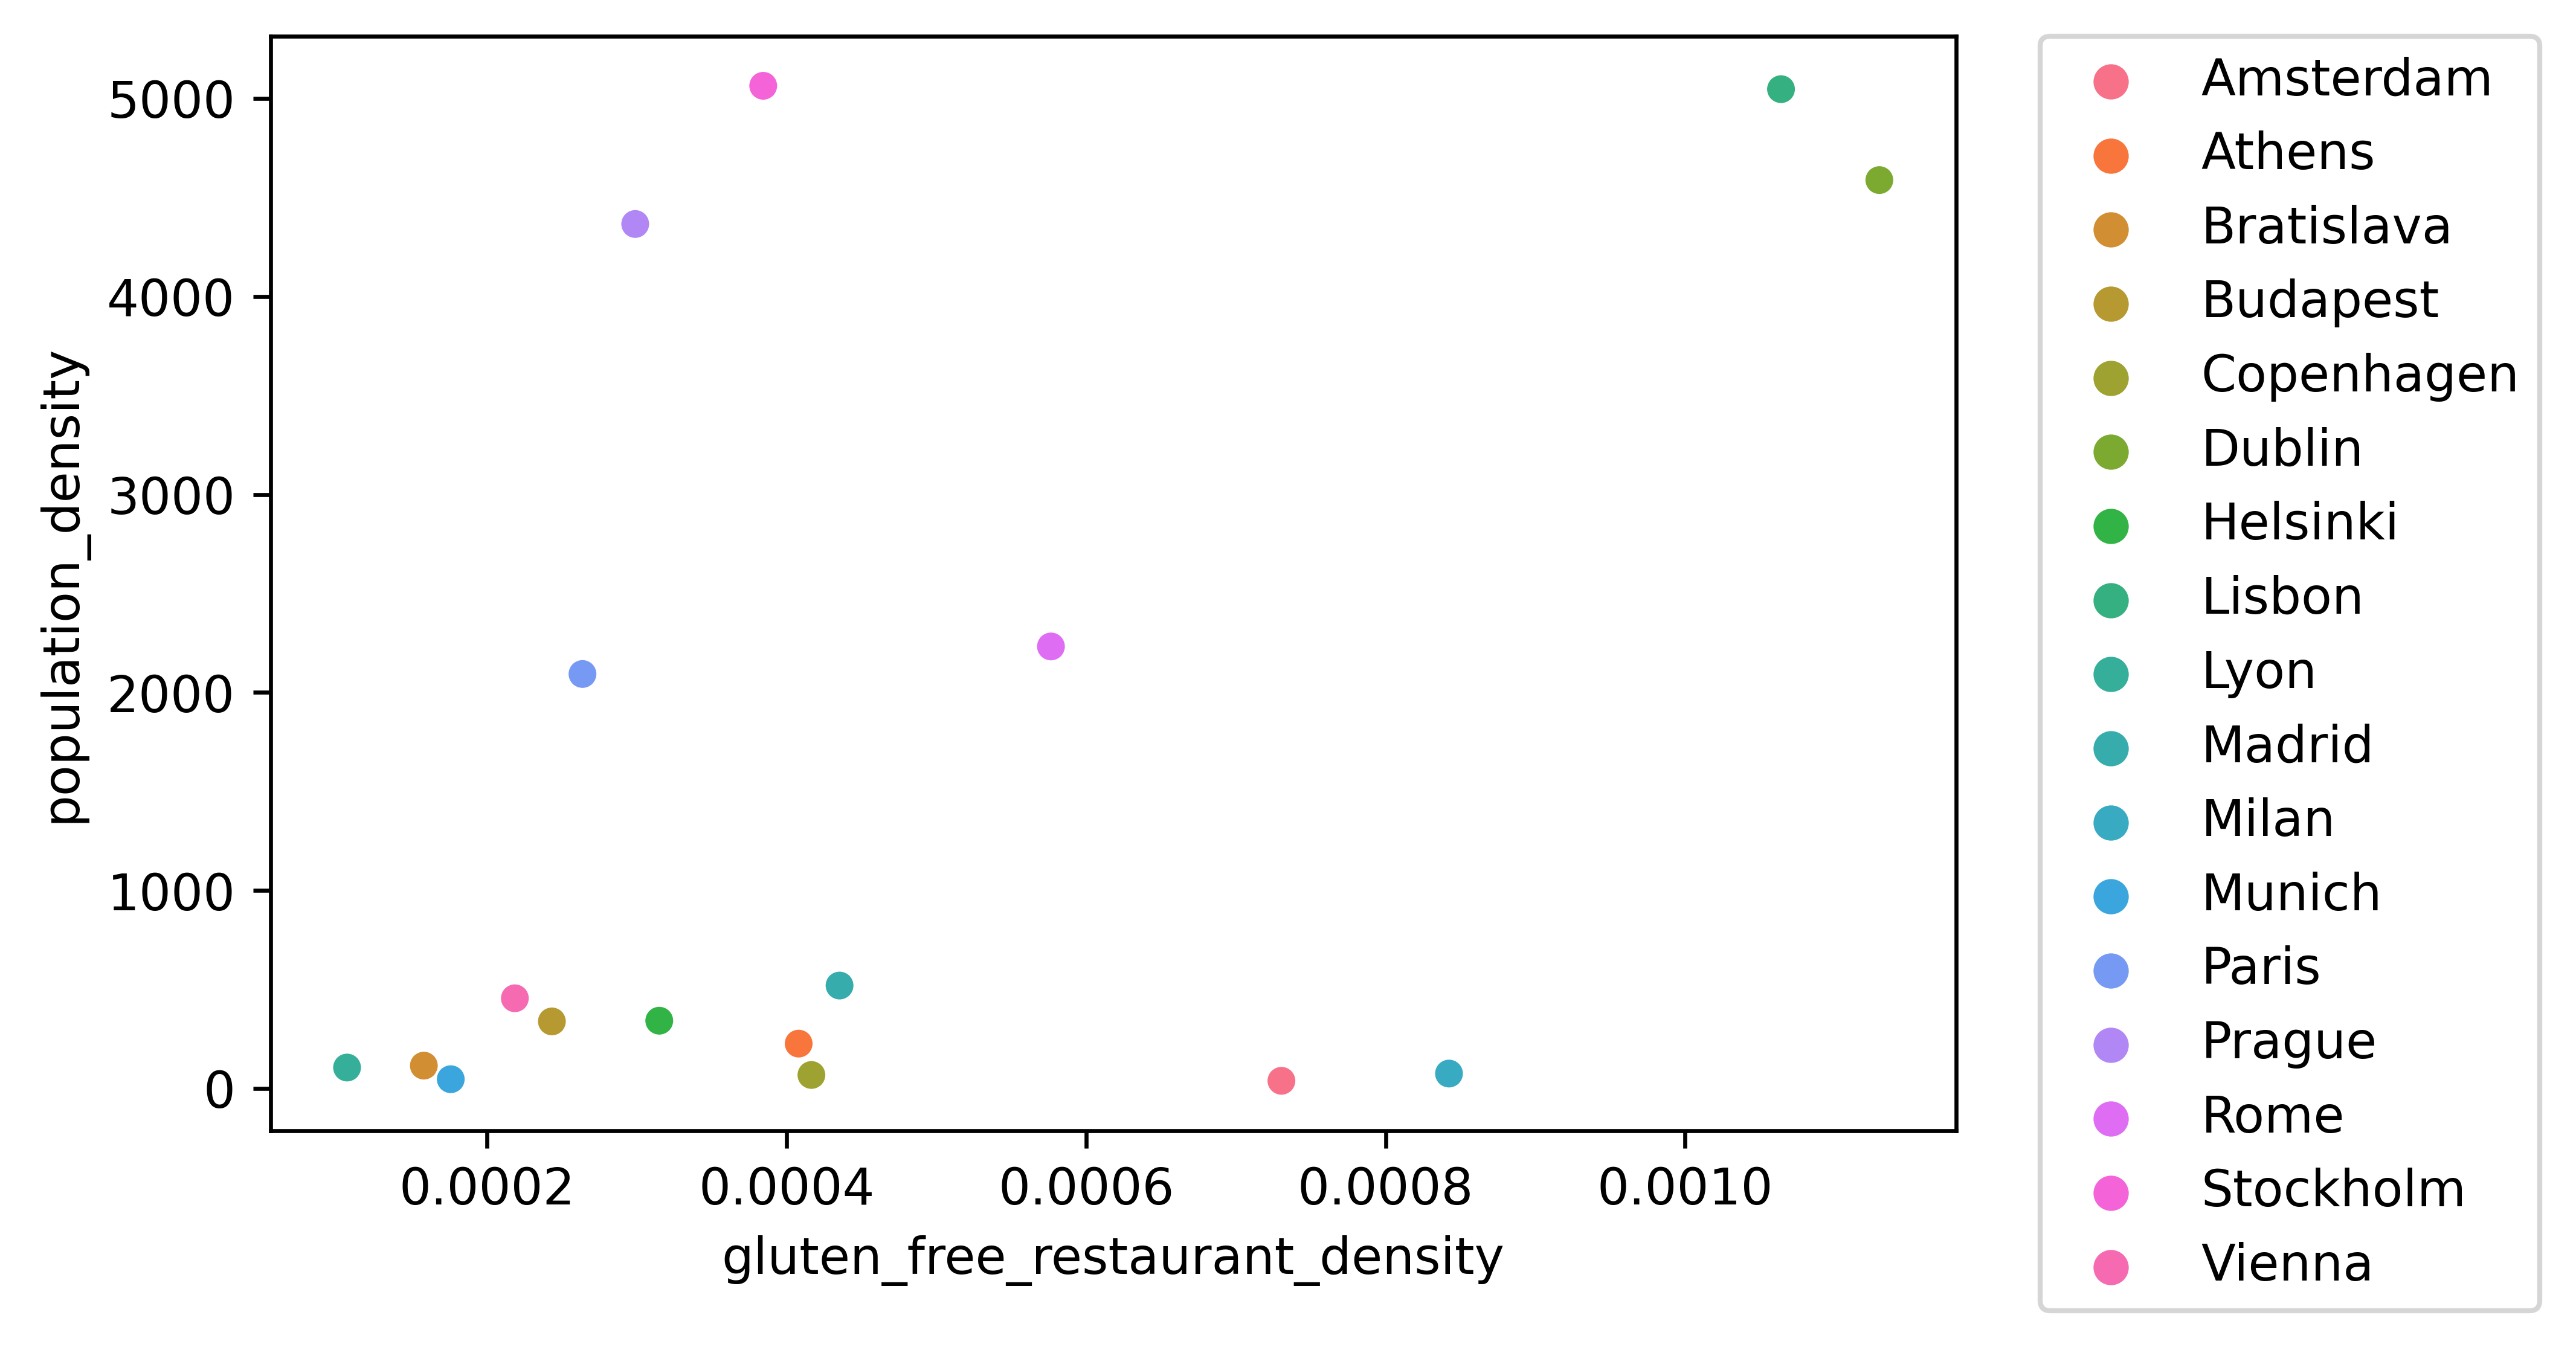

In [23]:
sns.scatterplot(data=gluten_capitals, y='population_density', x='gluten_free_restaurant_density', hue='city')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 🗣️ Discussion

Of course there are other multivariate optimization techniques (numerical analysis, machine learning, operations research, etc.). However, I will be drawing conclusions using a simple visual.

Looking at the scatter chart above, the graph can be divided diagonally from bottom left to top right. All cities in the upper region are chosen

> It is also clear from the chart how these 5 countries aren't clustered along the horizontal axis like the others

### ✅ Results and Conclusion

We can say that the cities which I would chose to open a gluten-free restaurant in should have high population desity and low gluten-free restaurant density:

1. Paris
2. Prague
3. Stockholm
4. Lisbon
5. Lyon

----

## 3.2 Think and propose a couple of other ways this dataset could be used to help businesses.

>This dataset contains data that can be used to benefit businesse across a wide domain of applications. Nonetheless, it would be much more beneficial with more available data.

I will provide two examples to demonstrate my point:

**Sales and Marketing**
A business can use this dataset to identify the best locations in which they can maximize reach. Similar to the calculation I did above of population density, a business can do so and find that it would be best for them to set up marketing campaigns in locations with high population density. Planning for events is also related to this problem.


**Logistics**
Businesses need to move. They also need to move things around. Let's take a case where a postal service needs to identify areas in the city with low traffic so that they can deliver parcels quickly. The population data in a city can and its link to traffic can be studied in order to minimize the time that a delivery takes place.

-----

# 4.0 Bonus Question 🚩

Question: In the assets directory, you will see a file called paris_bounding_polygon.json. This contains a list of latitude and longitude coordinates that define a polygon that is considered to represent the Paris city area. For simplicity, we assume the population distribution is uniform in the Paris city area. An Italian restaurant wants to open a restaurant in Paris in a zone where there are the fewest Italian restaurants. What is the best location to open the restaurant (the answer can be a single point or a bounding box/polygonal region depending on the implementation)?


> The Italian restaurant wants to maximize its reach and its potential customer base. It can do so by being right in the center of the perimeter of Paris

This is an **optimization** problem where our target is to:
- Minimize the average distance from the perimeter surrounding Paris Area

**Strategy**

1. Draw a visual map based on given coordinates.
2. Visually and losely predict the location which should lie in the center.
3. Confirm it using the minimization of distance (or center of mass) algorithm

<AxesSubplot:xlabel='x', ylabel='y'>

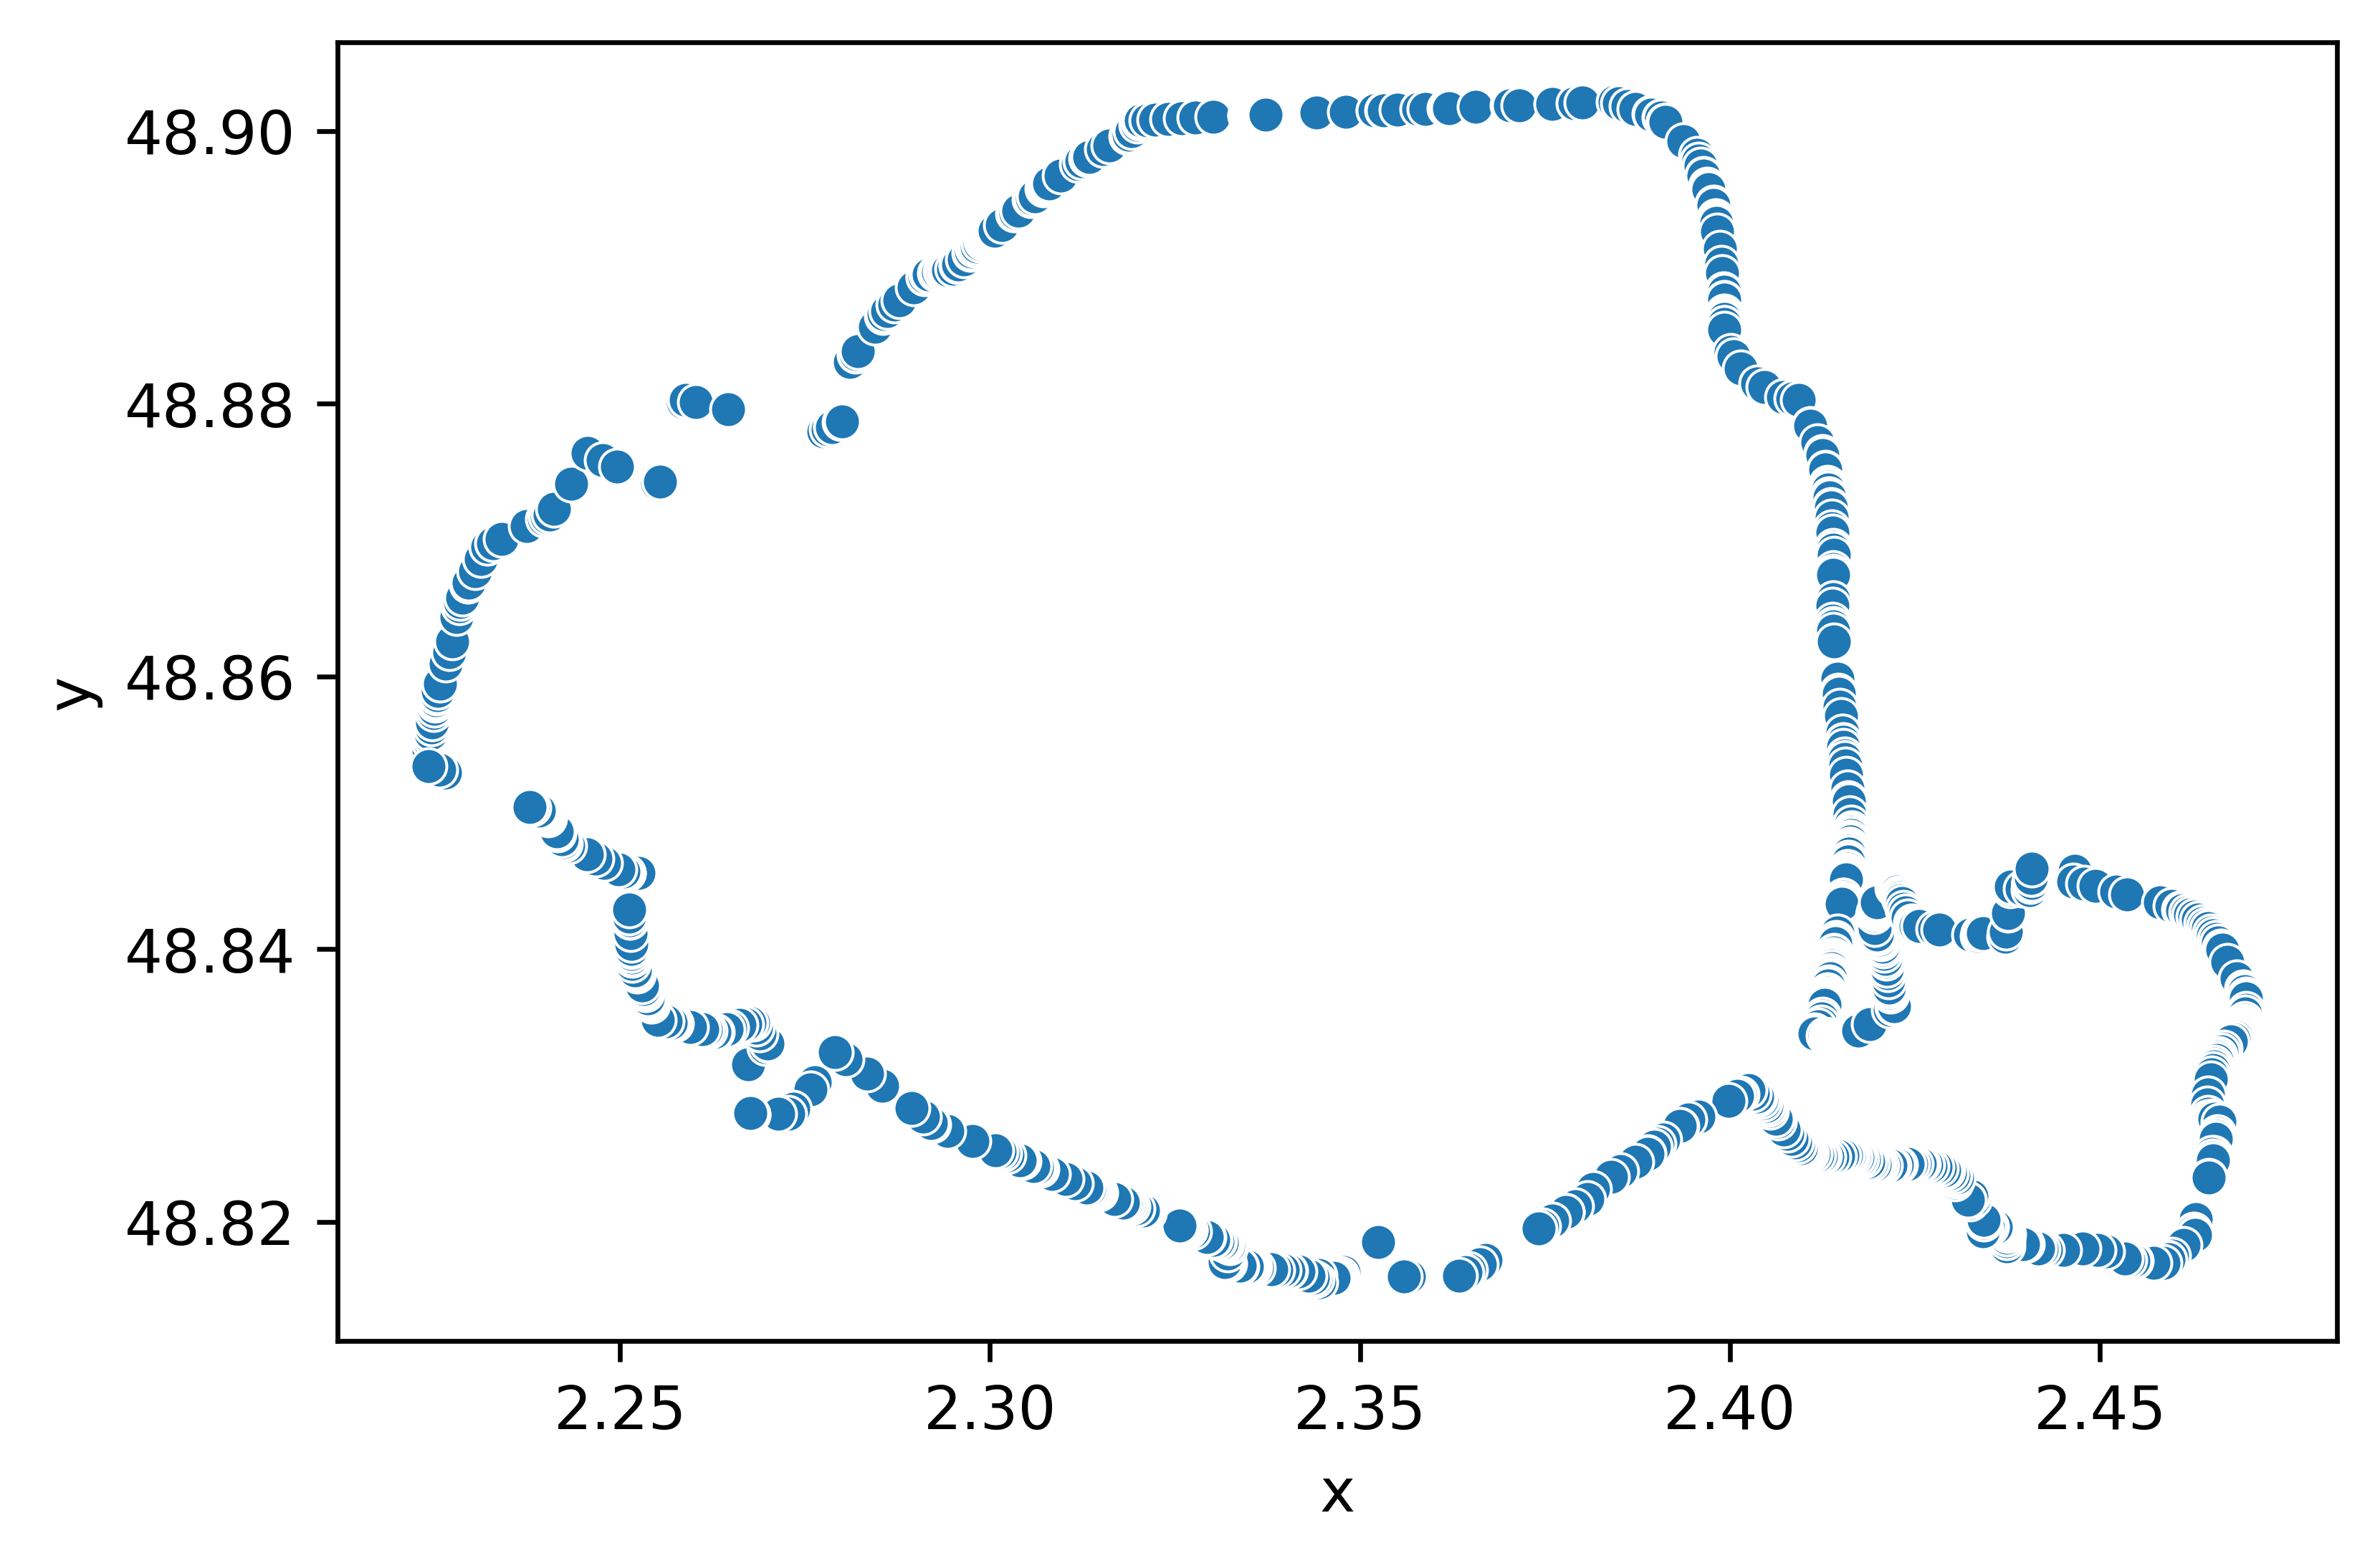

In [24]:
# Load the dataset
with open('./assets/paris_bounding_polygon.json', 'r') as file:
    paris_area_list = json.load(file)

paris_area = pd.DataFrame(paris_area_list, columns=['x', 'y'])

paris_area
sns.scatterplot(data='paris_area', x=paris_area['x'], y=paris_area['y'])

### 🗣️ Discussion

Based on the chart above we can make a wild guess about the location of where the restaurant should be.

The idea is that it should be at **the center**.

> According to this map, it will be in coordinate around **(2.35,48.86)**

>In order to confirm this value, the **function below** that I wrote can do that by finding the point that **minimizes the average distance** between the parameter points

In [25]:
'''Given a set of parameter coordinates, find best location'''
def FindBestLocation(df=paris_area):
    no_steps = 5
    max_x, min_x = df['x'].max(), df['x'].min()
    max_y, min_y = df['y'].max(), df['y'].min()

    x_range = np.linspace(min_x, max_x, no_steps)
    y_range = np.linspace(min_y, max_y, no_steps)
    avg_dist = np.array([])
    avg_dist_points = []
    parameter_vals = df.values
    
    for x in x_range:
        for y in y_range:
            in_point = np.array([x,y])
            in_to_out_dist = np.array([])
            for out_point in parameter_vals: 
                in_to_out_dist = np.append(in_to_out_dist, distance.euclidean(in_point, out_point))
            avg_dist = np.append(avg_dist, in_to_out_dist.mean())
            avg_dist_points.append([x,y])

    avg_dist_points = np.array(avg_dist_points)
    return {
        'avg_dist': avg_dist, 
        'avg_dist_points': avg_dist_points,
        'optimal_point_dist': avg_dist.min(),
        'optimal_point': avg_dist_points[np.where(avg_dist  == avg_dist.min())]
    }


In [26]:
# Run the function above
best_location_metrics = FindBestLocation()

# Extract the point
print('Optimal Point:', best_location_metrics['optimal_point'][0])
print('Minimum Average Distance:', best_location_metrics['optimal_point_dist'])

Optimal Point: [ 2.40835063 48.83722063]
Minimum Average Distance: 0.07044898460809534


### ✅ Results and Conclusion

> Based on our **visual guess** and **minimization algorithm**, we have proved that the best place to open an Italian restaurant in Paris, assuming the population distribution is uniform, is in the coordinates **(2.40835063, 48.83722063)**

**Closing Remarks**

The accuracy of the algorithm can be improved by reducing the step size between one point and the next. Moreover, we have to also take into account other methods of improving performance. The data size to test was relatively small, but with bigger sets, more efficient algorithms are required

Also, having more data would allow us solve this problem better. For example, a z-coordinate would also impact the distance and thus render more realistic results.

----

# 5.0 Closing 🌇

## Limitations and Improvements

There are many instances where I think I could further have improved on this endeveour:

1. **Code performance**: Re-factoring of the code would drastically speed up the algorithms. For example, in _Section 1_, finding the number of rows could have been incorporated into the sorting function, saving a lot of time. Also, _section 4_, the tripple _for_ loops is definitely of high O(n^3). A lot can surely be made more efficient.

2. **Not Implementing Version Control**: Although stated in the instruction, I must admit that I did not heed much attention to using GitHub throughout the project. Of course I understand that it's crucial, but its still a habit I'm forming.

3. **Data Visuals**: The visuals could have surely been improved. For example, looking at the last chart, a better option would be to use a map overlay for better visual effect. Besides that, simple things like legend and title were neglected, unfortunately. I'm quite adept with the concepts behind using good visuals to communicate. However, my applied knowledge is in a "catching-up" state.

4. **Rigorous Quantitative Methods**: Probabilistic, stochastic and statistical models, machine learning, numerical analysis, dynamic programming, optimization and several other very powerful quantitive methods can be used to analyze and derive marvelous results. Due to the limitation of time, it also became a limitation of this project.

5. **Research and Integration of Social Theories**: Through the marriage of qualitative and quantitative methods, wonderful stories are told. Had there been ample time, more research into this could really answer many questions. For instance, _why_ do people review vegetarian restaurants higer? Or are people more likely to put effort and review only if they had a good experience? Questions like these allow us to unearth the data behind the data and solve critical problems.

>Besides that, much more can be said, so much more can be done.

## Acknowledgements 🙏

I want to thank FoodStyles and it's members for granting me this opportunity.

I want to also thank _Veronica_ and _Erica_ from the creative team for reaching out and being so cooperative, throughout.

Finally, whether or not I get the opportunity to be a part of you team, I fully support what you guys are doing.

Keep on! 💪